<a href="https://colab.research.google.com/github/mluthfi1919/projectsvm/blob/main/svm6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install micromlgen

  Preparing metadata (setup.py) ... done
  Created wheel for micromlgen: filename=micromlgen-1.1.28-py3-none-any.whl size=32152 sha256=40bf6593841f261649fb36fc5e808b2dc1da324ce0ed64ddfa2c8e295958d46b
  Stored in directory: /root/.cache/pip/wheels/97/54/64/5d82c310920abe1be0d120313ceb9e12c88f5701f53f6ed248
Successfully built micromlgen


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from micromlgen import port
from sklearn.svm import SVC
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/Penelitian/Dataset/NewDataset1.csv', index_col = 0)
print(df.head())
print(df.info())

      joint1    joint2    joint3    joint4  Gerakan
no                                                 
1   0.000000  0.000931  0.122721  0.151753        1
2   0.315640  0.001020  0.121800  0.146222        1
3   0.477911  0.000842  0.119556  0.144964        1
4   0.588258  0.000355  0.118274  0.148856        1
5   0.086910  0.001197  0.115029  0.155030        1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 1 to 1200
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   joint1   1200 non-null   float64
 1   joint2   1200 non-null   float64
 2   joint3   1200 non-null   float64
 3   joint4   1200 non-null   float64
 4   Gerakan  1200 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 56.2 KB
None


In [5]:
df['Gerakan'].value_counts()/np.float(len(df))

<ipython-input-5-012708728125>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df['Gerakan'].value_counts()/np.float(len(df))


1    0.25
2    0.25
3    0.25
4    0.25
Name: Gerakan, dtype: float64

In [6]:
X = df.drop(['Gerakan'], axis=1)

y = df['Gerakan']

In [7]:
print(X)

        joint1    joint2    joint3    joint4
no                                          
1     0.000000  0.000931  0.122721  0.151753
2     0.315640  0.001020  0.121800  0.146222
3     0.477911  0.000842  0.119556  0.144964
4     0.588258  0.000355  0.118274  0.148856
5     0.086910  0.001197  0.115029  0.155030
...        ...       ...       ...       ...
1196  0.433686  0.060245  0.053848  0.156698
1197  0.422714  0.060378  0.053969  0.157576
1198  0.422618  0.060821  0.054369  0.160356
1199  0.400289  0.061796  0.055251  0.158483
1200  0.396439  0.063259  0.056573  0.161731

[1200 rows x 4 columns]


In [8]:
print('Input shape: ', X.shape)
print('Target variable shape: ', y.shape)

Input shape:  (1200, 4)
Target variable shape:  (1200,)


# SPLIT DATA

In [9]:
# Split data training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
X_train.shape, X_test.shape

((960, 4), (240, 4))

In [11]:
cols = X_train.columns

In [12]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [13]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

# MEAN AND STD DEVIASI

In [16]:
# mean and std deviasi
for i in scaler.mean_:
    print(f'{i}, ', end='')
print()
for i in scaler.scale_:
    print(f'{i}, ', end='')

0.3489312640229167, 0.13124884560520836, 0.23882951374270833, 0.16739279128854168, 
0.12803278726347433, 0.17124809817202125, 0.18330267742522005, 0.0604034695770903, 

# SEARCH BEST HYPERPARAMETER USING GRIDSEACHCV

In [20]:
# hyperparameter with GridSearchCV dengan 3 set parameter
# instantiate classifier with default hyperparameters with kernel='', C='' and gamma=''
svc2=SVC()

# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]

grid_search = GridSearchCV(estimator = svc2,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(X_train, y_train)
# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))
# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))
# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.7562


Parameters that give the best results : 

 {'C': 100, 'gamma': 0.9, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=100, gamma=0.9)


In [18]:
# hyperparameter with GridSearchCV dengan 1 set parameter
# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svc=SVC()

# declare parameters for hyperparameter tuning
clf = GridSearchCV(svc, {'kernel':('linear', 'poly', 'sigmoid', 'rbf'),
                         'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
                   cv=strat_k_fold)
clf.fit(X_train, y_train)

scores = cross_val_score(clf.best_estimator_, X_train, y_train, cv=strat_k_fold)
print(f"Accuracy: {scores.mean()*100:0.2f}%")
print('Parameters that give the best results :','\n\n', (clf.best_params_))
print('\n\nEstimator that was chosen by the search :','\n\n', (clf.best_estimator_))

Accuracy: 75.10%
Parameters that give the best results : 

 {'C': 100, 'gamma': 0.9, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=100, gamma=0.9)


In [21]:
#Best kernel SVM use rbf
svc_rbf=SVC(C=100.0, gamma=0.9)


# fit classifier to training set
svc_rbf.fit(X_train,y_train)


# make predictions on test set
y_pred_new=svc_rbf.predict(X_test)
CLF_accu=accuracy_score(y_test, y_pred_new)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100 and gamma=0.9 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_new)))
print('\nModel accuracy score with rbf kernel and C=100 and gamma=0.9: {:.2f}%'.format(CLF_accu*100))

Model accuracy score with rbf kernel and C=100 and gamma=0.9 : 0.7292

Model accuracy score with rbf kernel and C=100 and gamma=0.9: 72.92%


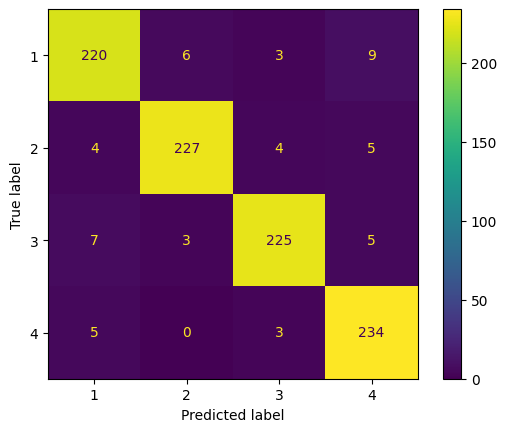

In [22]:
predictions = clf.best_estimator_.predict(X_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

# EVALUATE MODEL WITH TRAINING

In [23]:
training_predict = clf.predict(X_train)

In [24]:
from sklearn import metrics
print(metrics.classification_report(y_train, training_predict, digits = 3))

              precision    recall  f1-score   support

           1      0.932     0.924     0.928       238
           2      0.962     0.946     0.954       240
           3      0.957     0.938     0.947       240
           4      0.925     0.967     0.945       242

    accuracy                          0.944       960
   macro avg      0.944     0.944     0.944       960
weighted avg      0.944     0.944     0.944       960



In [25]:
print(metrics.confusion_matrix(y_train, training_predict))

[[220   6   3   9]
 [  4 227   4   5]
 [  7   3 225   5]
 [  5   0   3 234]]


In [26]:
print(f'Model accuracy: {round(metrics.accuracy_score(y_train, training_predict)*100,2)}%')

Model accuracy: 94.38%


# EVALUATE MODEL WITH TEST

In [29]:
test_predict = clf.predict(X_test)

In [30]:
print(metrics.classification_report(y_test, test_predict, digits = 3))

              precision    recall  f1-score   support

           1      0.632     0.774     0.696        62
           2      0.759     0.683     0.719        60
           3      0.793     0.767     0.780        60
           4      0.769     0.690     0.727        58

    accuracy                          0.729       240
   macro avg      0.738     0.728     0.730       240
weighted avg      0.737     0.729     0.730       240



In [31]:
print(metrics.confusion_matrix(y_test, test_predict))

[[48  7  3  4]
 [ 9 41  7  3]
 [ 6  3 46  5]
 [13  3  2 40]]


In [32]:
print(f'Model accuracy: {round(metrics.accuracy_score(y_test, test_predict)*100,2)}%')

Model accuracy: 72.92%


In [35]:
print(port(clf.best_estimator_, classmap={1: 'gerakan1',
                                          2: 'gerakan2',
                                          3: 'gerakan3',
                                          4: 'gerakan4'}))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class SVM {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        float kernels[558] = { 0 };
                        float decisions[6] = { 0 };
                        int votes[4] = { 0 };
                        kernels[0] = compute_kernel(x,   0.297012591773  , -0.660031537937  , -0.60872447315  , 0.37181875261 );
                        kernels[1] = compute_kernel(x,   0.34813039636  , 1.76475867832  , -0.096817673326  , 0.474036142492 );
                        kernels[2] = compute_kernel(x,   0.372561692959  , 0.576826332375  , -0.360639837188  , 0.081637656677 );
                        kernels[3] = compute_kernel(x,   0.73376909919  , 0.129507285812  , 0.195419476466  , -1.3309968757 );
                        kernels[4] = compute

In [36]:
with open('D:\Kuliah\kuliah_1\Kehidupan\PenelitianBuAnik\Penelitian\Skripsi\Proposal\Percobaan_arduino\percobaan6\svm.h', 'w') as file:
    file.write(port(clf.best_estimator_, classmap={1: 'gerakan1',
                                          2: 'gerakan2',
                                          3: 'gerakan3',
                                          4: 'gerakan4'}))